In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_parquet('/home/walml/repos/zoobot-predictions/data/desi_wds/representations/convnext_nano_evo/representations_pca_40.parquet')

In [7]:
df

,id_str,hdf5_loc,feat_pca_0,feat_pca_1,feat_pca_2,feat_pca_3,feat_pca_4,feat_pca_5,feat_pca_6,feat_pca_7,...,feat_pca_30,feat_pca_31,feat_pca_32,feat_pca_33,feat_pca_34,feat_pca_35,feat_pca_36,feat_pca_37,feat_pca_38,feat_pca_39
0,303240_2499,grouped.hdf5,4.022428,3.519768,0.232894,-7.422507,-3.423925,-1.786648,-4.684878,0.037631,...,0.494907,0.096283,0.101140,1.345870,0.033838,-0.774624,0.157456,0.119926,0.132035,-0.246133
1,541141_4028,grouped.hdf5,1.937404,-0.093775,5.623333,6.530562,-1.092363,1.262468,1.533178,-5.270568,...,-0.156803,1.321219,0.074621,0.242963,-0.819564,-0.249762,-0.040701,0.283347,0.089011,0.711035
2,342751_521,grouped.hdf5,-3.883912,-6.308359,3.323835,0.760426,2.917709,-0.006925,0.815008,-1.414919,...,0.625224,0.033481,-0.184607,-0.083190,0.103959,-0.080956,0.266658,-0.095988,-0.296155,-0.053305
3,76349_1685,grouped.hdf5,3.866738,-3.825184,3.735054,0.355256,1.493767,-0.329399,0.889355,-1.517896,...,-0.216870,0.210759,-0.240307,0.289586,0.366458,-0.479526,-0.047569,0.203839,0.175090,-0.115850
4,576940_2831,grouped.hdf5,-9.905405,-7.122462,-1.946045,0.296296,-3.306998,-0.872199,0.645919,0.693108,...,-1.292659,-1.414020,0.572648,-0.186134,0.191534,0.304707,-0.248192,0.661070,-0.215321,-0.282297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967931,408036_618,grouped.hdf5,-3.651728,-6.696292,0.914401,0.724344,3.601455,-0.035014,0.852608,-0.518591,...,0.578242,0.010297,-0.106915,0.341155,0.149630,0.074239,0.140842,-0.114774,-0.025323,0.036893
7967932,461647_3816,grouped.hdf5,10.667393,-1.718616,-4.660904,0.121121,0.694244,-0.397462,1.134327,-0.606771,...,-0.398023,-0.261947,-0.188122,0.623687,-0.128791,-0.713169,-0.452212,0.097566,-0.482356,0.327060
7967933,525388_1354,grouped.hdf5,-1.711249,1.054903,4.535055,3.009035,0.916643,4.120741,0.618549,0.904406,...,0.365415,-0.250884,-0.756545,0.510194,0.198684,-0.835140,0.086588,-0.386079,0.198846,-0.328437
7967934,183139_3364,grouped.hdf5,-1.488508,7.263745,1.146487,-6.030383,-0.722973,-1.268676,-0.674682,-2.272514,...,-0.216364,0.663253,-0.774821,-0.047273,-1.159642,-0.120112,-0.768894,-0.694097,0.613561,0.967112


In [8]:
max_components = 20
pca_cols = [f'feat_pca_{i}' for i in range(max_components)]

In [9]:
df = df[['id_str'] + pca_cols]

In [10]:
MORPH_LOC = '~/Dropbox (The University of Manchester)/desi/catalogs/gz_desi_deep_learning_catalog_friendly.parquet'
CATALOG_LOC = '~/Dropbox (The University of Manchester)/desi/catalogs/master_all_file_index_passes_file_checks.parquet'

In [11]:
morph = pd.read_parquet(MORPH_LOC, columns=['dr8_id', 'smooth-or-featured_smooth_fraction', 'smooth-or-featured_featured-or-disk_fraction'])

In [12]:
catalog = pd.read_parquet(CATALOG_LOC, columns=['dr8_id', 'ra', 'dec'])

In [13]:
df['dr8_id'] = df['id_str']
del df['id_str']
df = pd.merge(df, catalog, how='inner', validate='one_to_one', on='dr8_id')
print(len(df))
df.to_parquet('/home/walml/Dropbox (The University of Manchester)/zoobot_predictions/data/desi_wds/representations/convnext_nano_evo/representations_pca_40_with_coords.parquet')

/tmp/ipykernel_85704/2061300504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dr8_id'] = df['id_str']


7967936


In [10]:
df['dr8_id'] = df['id_str']
df = pd.merge(df, morph, how='inner', validate='one_to_one', on='dr8_id')
print(len(df))

/tmp/ipykernel_83763/3573178385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dr8_id'] = df['id_str']


7967936


In [11]:
df.sample(10)

,id_str,feat_pca_0,feat_pca_1,feat_pca_2,feat_pca_3,feat_pca_4,feat_pca_5,feat_pca_6,feat_pca_7,feat_pca_8,...,feat_pca_13,feat_pca_14,feat_pca_15,feat_pca_16,feat_pca_17,feat_pca_18,feat_pca_19,dr8_id,smooth-or-featured_smooth_fraction,smooth-or-featured_featured-or-disk_fraction
4849376,70927_1398,-4.905856,2.068545,5.336057,2.642682,-3.347245,1.762461,-2.697662,0.634721,1.681497,...,0.414422,1.554634,-0.313258,0.810853,0.844812,-0.785818,0.371456,70927_1398,0.800194,0.124742
4805777,430498_219,5.157771,4.710983,0.686521,5.378846,-1.680518,4.880503,1.576630,-2.136131,-0.203387,...,-0.285271,-0.137828,1.422469,-0.687177,-0.695441,0.132100,0.674789,430498_219,0.809736,0.082925
2729141,137621_4130,-4.581609,4.333554,1.461419,3.306460,2.344579,2.865182,0.386044,-1.552211,-2.724841,...,-1.465325,-0.035892,-1.527889,0.171180,-0.065065,1.154853,-0.724597,137621_4130,0.700589,0.213188
1851670,280975_4327,6.090794,4.879530,-3.141385,-8.444903,-1.620127,-2.893708,4.843383,-0.177402,-2.585089,...,-1.162547,-2.208458,-0.954064,-1.438876,-0.516511,0.079678,-0.586904,280975_4327,0.678110,0.247233
2038152,655625_2077,-6.247751,-10.338526,1.986020,0.388670,-3.605805,-1.536379,0.302228,0.096978,-2.181506,...,-0.536187,-0.835845,-0.521775,1.271480,0.413682,0.597025,-1.006519,655625_2077,0.901591,0.043182
3106960,454930_2146,-3.465400,-5.411200,7.010413,2.289561,-6.338119,-0.246314,0.574427,-0.482216,-1.214513,...,0.260661,-0.333305,1.706312,1.504609,1.726411,1.150512,-0.333879,454930_2146,0.900016,0.036274
65889,641877_4093,5.876258,0.734558,1.288137,0.602842,1.204711,2.480437,0.894867,2.618596,2.186988,...,-0.990844,0.512348,1.782737,-0.712672,-1.146264,1.133709,-0.253878,641877_4093,0.829073,0.066417
275330,445577_1166,7.824822,-0.485844,-0.214293,-1.260664,1.994981,2.847932,1.530403,5.467557,2.553360,...,0.262802,1.149226,1.489188,-1.060991,0.266200,0.913607,-0.094710,445577_1166,0.821746,0.067526
6982533,411145_3644,-2.662953,-4.805607,3.811447,0.360443,3.156580,1.318365,0.019466,0.376536,-0.174894,...,-0.496387,0.205899,0.111734,-0.051378,-0.158041,0.036685,-0.024779,411145_3644,0.846336,0.082966
4926086,431635_2080,-1.164702,2.932025,1.906528,5.617044,0.276231,2.221781,1.081989,0.225922,0.325589,...,-0.967901,-0.085778,-0.090915,-0.906202,-0.968324,1.459064,-0.326927,431635_2080,0.781465,0.097187


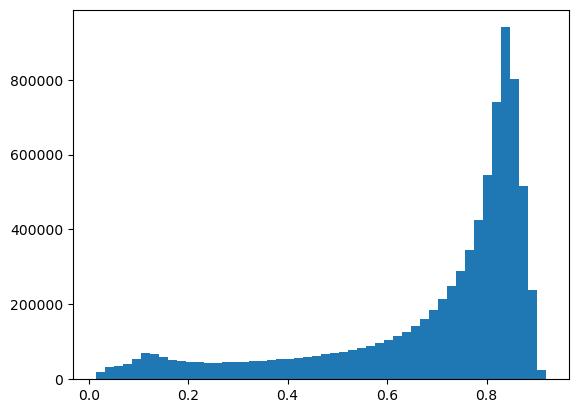

In [12]:
_ = plt.hist(df['smooth-or-featured_smooth_fraction'], bins=50)

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

df_s = df.sample(100000)

X = df_s[[col for col in df_s if col.startswith('feat_pca_')][:20]].values
y = df_s['smooth-or-featured_smooth_fraction'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = GradientBoostingRegressor()
model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)



/home/walml/miniforge3/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9723047864884286

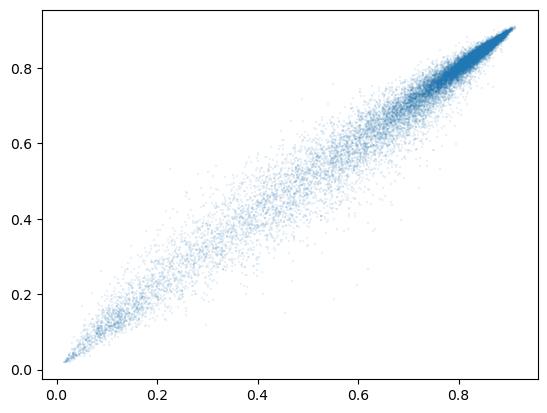

In [17]:
y_test_pred = model.predict(X_test)

plt.scatter(y_test, y_test_pred, marker='+', alpha=.1, s=1.)
